In [34]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

In [35]:
data_generator = CmdStanModel(stan_file = r'generate_data.stan')


INFO:cmdstanpy:found newer exe file, not recompiling


In [36]:
I = 6 
N = 7 
DoB = 14071999
seed = int(DoB+1e4+100*I+N)
print(seed)
generated_data = data_generator.sample(chains=1, iter_sampling=1, iter_warmup=0, fixed_param=True, seed=seed)

INFO:cmdstanpy:CmdStan start processing


14082606


chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


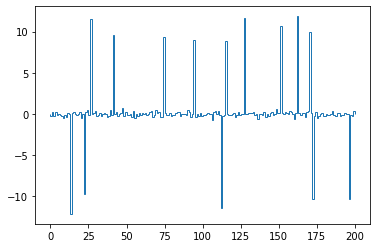

In [37]:
beta_s = generated_data.stan_variable('beta')
plt.stairs(generated_data.stan_variable('beta')[0])

In [38]:
model_uniform = CmdStanModel(stan_file = r'model1.stan')


INFO:cmdstanpy:found newer exe file, not recompiling


In [39]:
data_for_inference = {'N':100,
                      'M':200,
                      'X':generated_data.stan_variable('X')[0],
                      'y': generated_data.stan_variable('y')[0]
                      }

In [40]:
fit_unf = model_uniform.sample(data=data_for_inference, seed=seed)


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:01 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:03 Iteration:  100 / 2000 [  5%]  (Warmup)




chain 1 |█▊        | 00:06 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:08 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:10 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:12 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:14 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:16 Iteration:  700 / 2000 [ 35%]  (Warmup)
chain 1 |████▌     | 00:18 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:21 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:23 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:25 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:27 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 


INFO:cmdstanpy:CmdStan done processing.


In [41]:
print(fit_unf.diagnose())

Processing csv files: C:\Users\macie\AppData\Local\Temp\tmpw70vbgbz\model1-20220516232634_1.csv, C:\Users\macie\AppData\Local\Temp\tmpw70vbgbz\model1-20220516232634_2.csv, C:\Users\macie\AppData\Local\Temp\tmpw70vbgbz\model1-20220516232634_3.csv, C:\Users\macie\AppData\Local\Temp\tmpw70vbgbz\model1-20220516232634_4.csv

Checking sampler transitions treedepth.
3994 of 4000 (99.85%) transitions hit the maximum treedepth limit of 10, or 2^10 leapfrog steps.
Trajectories that are prematurely terminated due to this limit will result in slow exploration.
For optimal performance, increase this limit.

Checking sampler transitions for divergences.
6 of 4000 (0.15%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
The E-BFMI, 0.09, is

In [42]:
model_reg = CmdStanModel(stan_file = 'model2.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [43]:
fit_reg = model_reg.sample(data=data_for_inference,seed=seed)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)
chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)




chain 1 |████████▋ | 00:01 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████▌| 00:01 Iteration: 1800 / 2000 [ 90%]  (Sampling)
chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [44]:
print(fit_reg.diagnose())

Processing csv files: C:\Users\macie\AppData\Local\Temp\tmpw70vbgbz\model2-20220516232721_1.csv, C:\Users\macie\AppData\Local\Temp\tmpw70vbgbz\model2-20220516232721_2.csv, C:\Users\macie\AppData\Local\Temp\tmpw70vbgbz\model2-20220516232721_3.csv, C:\Users\macie\AppData\Local\Temp\tmpw70vbgbz\model2-20220516232721_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



In [45]:
model_lap = CmdStanModel(stan_file = 'model3.stan')


INFO:cmdstanpy:found newer exe file, not recompiling


In [46]:
fit_lap = model_lap.sample(data=data_for_inference, seed=seed, adapt_delta=0.99, max_treedepth=12)


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:03 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:08 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:10 Iteration:  300 / 2000 [ 15%]  (Warmup)
chain 1 |██▋       | 00:12 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:14 Iteration:  500 / 2000 [ 25%]  (Warmup)
chain 1 |███▋      | 00:17 Iteration:  600 / 2000 [ 30%]  (Warmup)
chain 1 |████      | 00:19 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:21 Iteration:  800 / 2000 [ 40%]  (Warmup)
chain 1 |█████     | 00:26 Iteration:  900 / 2000 [ 45%]  (Warmup)



chain 1 |█████▉    | 00:31 Iteration: 1001 / 2000 [ 50%]  (Sampling)
chain 1 |██████▎   | 00:36 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:41 Iteration: 1200 / 2000 [ 60%]  (Sampling)

chain 1 |███████▎  | 00:46 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:51


INFO:cmdstanpy:CmdStan done processing.


In [47]:
print(fit_lap.diagnose())


Processing csv files: C:\Users\macie\AppData\Local\Temp\tmpw70vbgbz\model3-20220516232725_1.csv, C:\Users\macie\AppData\Local\Temp\tmpw70vbgbz\model3-20220516232725_2.csv, C:\Users\macie\AppData\Local\Temp\tmpw70vbgbz\model3-20220516232725_3.csv, C:\Users\macie\AppData\Local\Temp\tmpw70vbgbz\model3-20220516232725_4.csv

Checking sampler transitions treedepth.
983 of 4000 (24.57%) transitions hit the maximum treedepth limit of 12, or 2^12 leapfrog steps.
Trajectories that are prematurely terminated due to this limit will result in slow exploration.
For optimal performance, increase this limit.

Checking sampler transitions for divergences.
1 of 4000 (0.03%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
The E-BFMI, 0.01, is 